# Deep Learning Task

Installing a package to download data from Kaggle

In [1]:
!pip install -q opendatasets

In [2]:
!pip install scikit-learn==1.2.2

In [3]:
import opendatasets as od
import pandas as pd

In [4]:
!pip install torch torchvision

In [5]:
# Import necessary packages.
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import random_split
from torch.utils.data import DataLoader, Subset

import torchvision
from torchvision import datasets
from torchvision.datasets import DatasetFolder
import torchvision.transforms as transforms

# This is for the progress bar
from tqdm.auto import tqdm
# This is for ploting
import matplotlib.pyplot as plt
import seaborn as sns

Downloading and Loading dataset from Kaggle

In [6]:
od.download('https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images', force = True)

Dataset URL: https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images


100%|█████████████████████████████████████████████████████████████████████████████| 34.1M/34.1M [00:02<00:00, 14.6MB/s]


Displaying a single image from dataset and its shape

Shape of the image is: (176, 208)


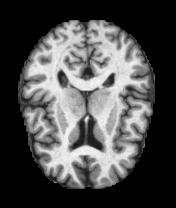

In [7]:
img = Image.open('./alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem1023.jpg')
print("Shape of the image is:", img.size)
display(img)

In [8]:
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [9]:
import os
file_path = './alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset'

images = []
labels = []
for subfolder in tqdm(os.listdir(file_path)):
    subfolder_path = os.path.join(file_path, subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)
df = pd.DataFrame({'image': images, 'label': labels})
df



  0%|          | 0/2 [00:00<?, ?it/s]

,image,label
0,./alzheimers-dataset-4-class-of-images/Alzheim...,MildDemented
1,./alzheimers-dataset-4-class-of-images/Alzheim...,MildDemented
2,./alzheimers-dataset-4-class-of-images/Alzheim...,MildDemented
3,./alzheimers-dataset-4-class-of-images/Alzheim...,MildDemented
4,./alzheimers-dataset-4-class-of-images/Alzheim...,MildDemented
...,...,...
6395,./alzheimers-dataset-4-class-of-images/Alzheim...,VeryMildDemented
6396,./alzheimers-dataset-4-class-of-images/Alzheim...,VeryMildDemented
6397,./alzheimers-dataset-4-class-of-images/Alzheim...,VeryMildDemented
6398,./alzheimers-dataset-4-class-of-images/Alzheim...,VeryMildDemented


Compare distribution of different stages of Alzheimer in the dataset

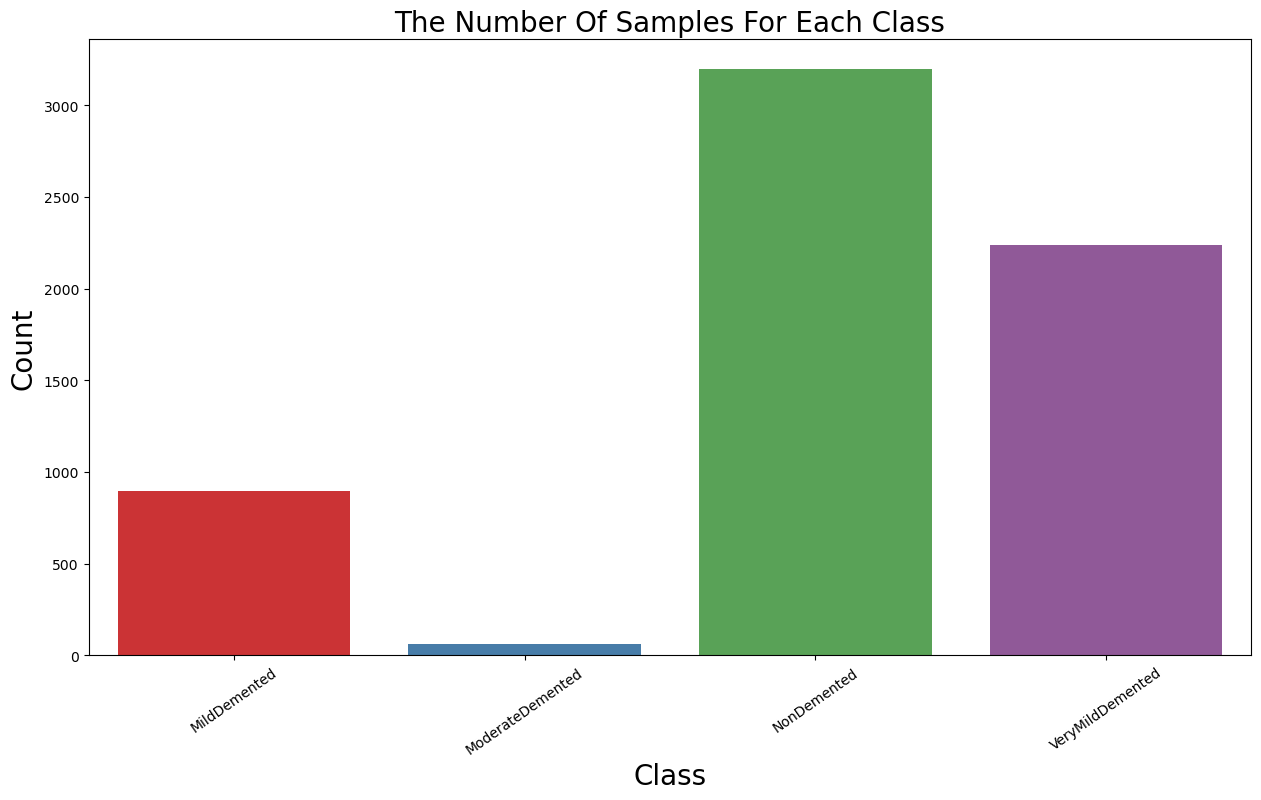

In [10]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)
plt.show()

Transform function for train and test set. This transformation pipeline enhances the training images by augmenting them and preparing them in a format suitable for input into a deep learning model.

In [11]:
# Define transform for training data
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224), #Randomly crop the image and resize it to height x width = (224x224)
    torchvision.transforms.RandomHorizontalFlip(), # Randomly flip the image horizontally
    torchvision.transforms.ToTensor(),             # Convert the image to tensor
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize the image
])

In [12]:
# Define transform for testing and/validation data
test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),     # Resize the image to 256x256
    torchvision.transforms.CenterCrop(224), # Crop the center of the image to 224x224
    torchvision.transforms.ToTensor(),      # Convert the image to tensor
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224,0.225]) # Normalize the image
])

Getting train and test dataset from different folders

In [13]:
train_dataset = datasets.ImageFolder("./alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train", transform=train_transform)
test_dataset = datasets.ImageFolder("./alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test", transform=test_transform)

Splitting of dataset in train set, validation set and test set

In [14]:
# Define the desired ratio for train and evaluation data (e.g., 90% train, 10% evaluation)
train_ratio = 0.9
val_ratio = 1 - train_ratio

In [15]:
# calulating the sizes of train and evaluation datasets based on the ratios
train_size = int(train_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

In [16]:
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

In [17]:
print(f'Original train set has {len(train_dataset)} samples')
print(f'Train set has {len(train_subset)} samples')
print(f'Validation set has {len(val_subset)} samples')
print(f'Test set has {len(test_dataset)} samples')

Original train set has 5121 samples
Train set has 4608 samples
Validation set has 513 samples
Test set has 1279 samples


In [18]:
 # now we will define batch size for training, validation, and testing
 batch_size = 32

Create three DataLoader objects using the PyTorch library, which are responsible for loading data in batches during the training, validation, and testing phases of a machine learning model.
DataLoader objects facilitate efficient and systematic loading of data in batches, which is crucial for training, validating, and testing deep learning models.

In [19]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
valid_loader =  DataLoader(val_subset,batch_size=batch_size,shuffle=True)

Randomly select a specified number of images from a dataset, process them to be compatible with Matplotlib, and display them in a row of subplots with their corresponding labels.

In [20]:
#show some sample images
def show_samples(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        index = np.random.randint(len(dataset))
        image, label = dataset[index]
        axes[i].imshow(image.permute(1, 2, 0))  # Convert tensor to numpy array and permute dimensions
        axes[i].set_title('Label: {}'.format(dataset.classes[label]))
        axes[i].axis('off')
    plt.show()

Simple utility to quickly grab one batch of training data for use in training, validation, or inspection purposes.

In [21]:
# Get a batch of training data
def get_batch(train_loader):
    for images, labels in train_loader:
        return images, labels


Take a batch of images, arrange them into a grid, and display the grid without axis labels using Matplotlib.

In [22]:
# Make a grid from batch of images
def make_grid(images):
    # Make a grid from batch of images
    grid = torchvision.utils.make_grid(images, nrow=8, padding=2, pad_value=1)
    plt.figure(figsize=(15, 15))
    plt.imshow(grid.permute(1, 2, 0))  # Convert tensor to numpy array and permute dimensions
    plt.axis('off')
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


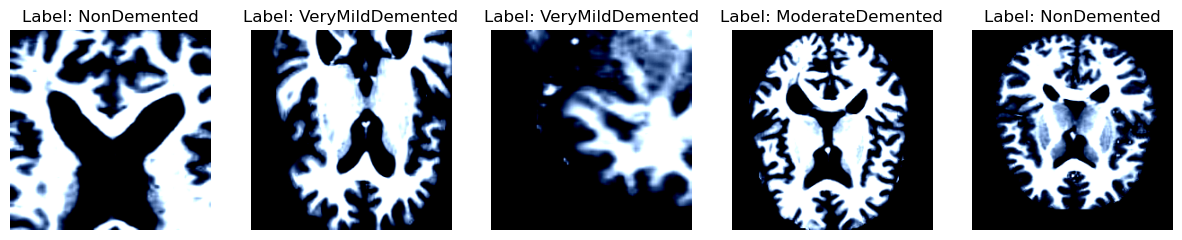

In [23]:
# Show some sample images
show_samples(train_dataset)

In [24]:
# get a batch of training data
images, labels = get_batch(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


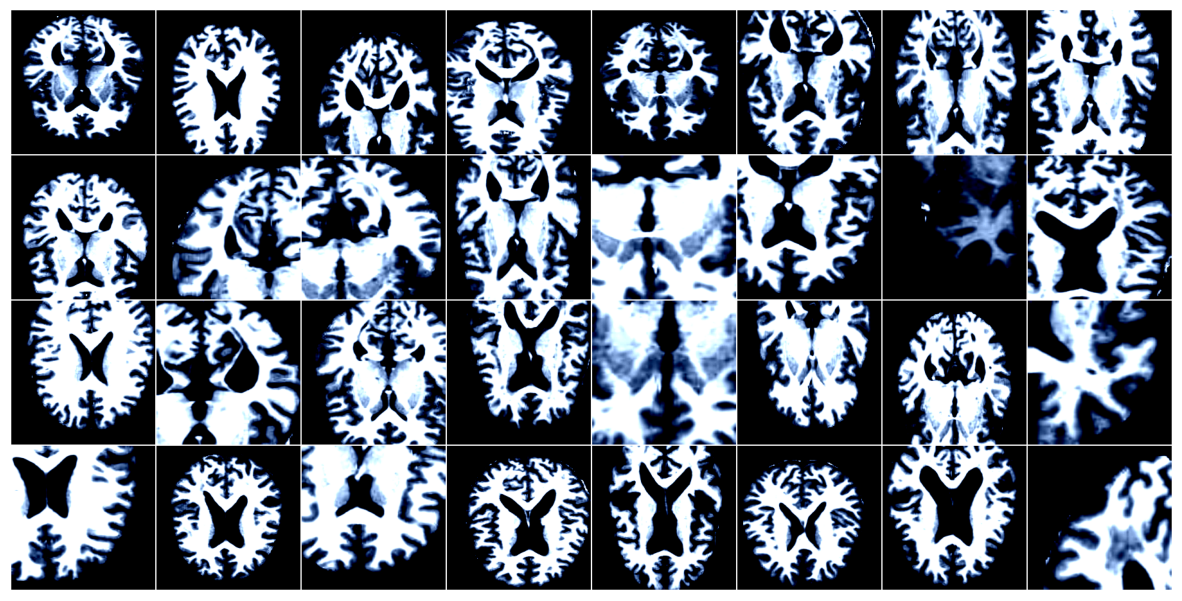

In [25]:
# make a grid from the batch of images
make_grid(images)

Define a convolutional neural network (CNN) model using PyTorch, which is intended for classification tasks. Set up a basic CNN with three convolutional layers followed by max pooling, and three fully connected layers for classification into four classes. The model expects input images of size 128x128, as inferred from the linear layer's input size.

In [26]:
import torch.nn.functional as F

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=128, kernel_size=3, stride=1, padding=1)
        # Define max pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Define fully connected layers
        self.fc1 = nn.Linear(100352, 32)  # Assuming input image size of 128x128 after max pooling 3 times
#         32, 128, 28, 28
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 4)  # Output size 4 for 4 classes

    def forward(self, x):
        # Apply convolutional layers with ReLU activation and max pooling
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        # Flatten the tensor for fully connected layers
        x = x.view(x.size(0), -1)
        # Apply fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

model = ConvNet()
print(model)  # Print the model architecture

ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)


Allow to automatically use a GPU if one is available, which can significantly speed up tensor operations and model training. If no GPU is available, the code will fall back to using the CPU.

In [28]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Training loop for a neural network model using PyTorch. Set the model in the appropriate mode (training or evaluation), to correctly handle the gradient computations, to record and average the loss and accuracy metrics, and to save the best model based on validation accuracy.

In [29]:
import torch.optim as optim

In [31]:

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the number of epochs
n_epochs = 50

# Initialize variables to store metrics
best_valid_acc = 0.0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []
for epoch in range(n_epochs):

    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):

        # Gradients stored in the parameters in the previous step should be cleared out first.
        optimizer.zero_grad()

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)
        logits = model(imgs)

        # Calculate the cross-entropy loss.
        # We don't need to apply softmax before computing cross-entropy as it is done automatically.
        loss = criterion(logits, labels)

        # Compute the gradients for parameters.
        loss.backward()

        # Update the parameters with computed gradients.
        optimizer.step()

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # The average loss and accuracy of the training set is the average of the recorded values.
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    model.eval()

    # These are used to record information in validation.
    valid_loss = []
    valid_accs = []

    # Iterate the validation set by batches.
    for batch in tqdm(valid_loader):

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # We don't need gradient in validation.
        # Using torch.no_grad() accelerates the forward process.
        with torch.no_grad():
          logits = model(imgs)

        # We can still compute the loss (but not the gradient).
        loss = criterion(logits, labels)

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # The average loss and accuracy for entire validation set is the average of the recorded values.
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), 'best_model.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 001/050] Train: loss=1.04289, acc=0.49146 | Valid: loss=0.95296, acc=0.50735


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 002/050] Train: loss=0.95687, acc=0.52620 | Valid: loss=0.92234, acc=0.54044


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 003/050] Train: loss=0.95432, acc=0.52873 | Valid: loss=0.86567, acc=0.60662


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 004/050] Train: loss=0.92738, acc=0.54736 | Valid: loss=0.94396, acc=0.54228


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 005/050] Train: loss=0.93563, acc=0.54387 | Valid: loss=0.89535, acc=0.53309


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 006/050] Train: loss=0.93125, acc=0.53901 | Valid: loss=0.85336, acc=0.61213


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 007/050] Train: loss=0.92137, acc=0.54464 | Valid: loss=0.93798, acc=0.51103


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 008/050] Train: loss=0.92353, acc=0.54095 | Valid: loss=0.96233, acc=0.53493


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 009/050] Train: loss=0.91637, acc=0.54697 | Valid: loss=0.83466, acc=0.60294


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 010/050] Train: loss=0.91489, acc=0.54387 | Valid: loss=0.83510, acc=0.62500


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 011/050] Train: loss=0.91702, acc=0.54814 | Valid: loss=0.84015, acc=0.57169


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 012/050] Train: loss=0.91509, acc=0.55357 | Valid: loss=0.85506, acc=0.59926


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 013/050] Train: loss=0.90787, acc=0.55609 | Valid: loss=0.92444, acc=0.53860


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 014/050] Train: loss=0.89899, acc=0.56269 | Valid: loss=0.84832, acc=0.61029


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 015/050] Train: loss=0.88842, acc=0.56929 | Valid: loss=0.81870, acc=0.57537


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 016/050] Train: loss=0.89022, acc=0.56619 | Valid: loss=0.92631, acc=0.55699


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 017/050] Train: loss=0.88742, acc=0.56308 | Valid: loss=0.84218, acc=0.58272


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 018/050] Train: loss=0.87932, acc=0.57220 | Valid: loss=0.78319, acc=0.60662


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 019/050] Train: loss=0.88134, acc=0.56599 | Valid: loss=0.85707, acc=0.58824


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 020/050] Train: loss=0.88913, acc=0.55551 | Valid: loss=0.84409, acc=0.63235


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 021/050] Train: loss=0.87537, acc=0.57007 | Valid: loss=0.92193, acc=0.51654


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 022/050] Train: loss=0.86883, acc=0.56638 | Valid: loss=0.81366, acc=0.53676


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 023/050] Train: loss=0.87546, acc=0.56425 | Valid: loss=0.84900, acc=0.56434


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 024/050] Train: loss=0.86547, acc=0.56968 | Valid: loss=0.82627, acc=0.60110


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 025/050] Train: loss=0.86768, acc=0.57453 | Valid: loss=0.82690, acc=0.59926


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 026/050] Train: loss=0.86872, acc=0.57279 | Valid: loss=0.84429, acc=0.60294


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 027/050] Train: loss=0.86172, acc=0.56677 | Valid: loss=0.82937, acc=0.54963


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 028/050] Train: loss=0.86661, acc=0.57259 | Valid: loss=0.78571, acc=0.59007


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 029/050] Train: loss=0.86307, acc=0.57706 | Valid: loss=0.76461, acc=0.64890


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 030/050] Train: loss=0.84535, acc=0.58191 | Valid: loss=0.78712, acc=0.61029


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 031/050] Train: loss=0.86113, acc=0.58210 | Valid: loss=0.77419, acc=0.61581


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 032/050] Train: loss=0.84900, acc=0.57104 | Valid: loss=0.82952, acc=0.59743


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 033/050] Train: loss=0.84149, acc=0.59161 | Valid: loss=0.88411, acc=0.54228


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 034/050] Train: loss=0.84208, acc=0.58385 | Valid: loss=0.85584, acc=0.54596


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 035/050] Train: loss=0.84141, acc=0.59259 | Valid: loss=0.75313, acc=0.59926


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 036/050] Train: loss=0.85306, acc=0.58346 | Valid: loss=0.90711, acc=0.56618


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 037/050] Train: loss=0.85512, acc=0.57628 | Valid: loss=0.73940, acc=0.60294


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 038/050] Train: loss=0.82399, acc=0.59006 | Valid: loss=0.88886, acc=0.52022


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 039/050] Train: loss=0.82571, acc=0.58482 | Valid: loss=0.79984, acc=0.61213


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 040/050] Train: loss=0.83045, acc=0.59220 | Valid: loss=0.84527, acc=0.58640


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 041/050] Train: loss=0.86741, acc=0.57026 | Valid: loss=0.84821, acc=0.57537


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 042/050] Train: loss=0.82802, acc=0.58599 | Valid: loss=0.76129, acc=0.60662


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 043/050] Train: loss=0.83024, acc=0.59239 | Valid: loss=0.79038, acc=0.54963


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 044/050] Train: loss=0.81819, acc=0.59763 | Valid: loss=0.75791, acc=0.61581


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 045/050] Train: loss=0.81628, acc=0.59550 | Valid: loss=0.75554, acc=0.63971


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 046/050] Train: loss=0.82310, acc=0.59589 | Valid: loss=0.92697, acc=0.54963


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 047/050] Train: loss=0.82428, acc=0.59103 | Valid: loss=0.83466, acc=0.59559


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 048/050] Train: loss=0.81372, acc=0.59802 | Valid: loss=0.77303, acc=0.57353


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 049/050] Train: loss=0.81269, acc=0.60016 | Valid: loss=0.81068, acc=0.58640


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

[Epoch: 050/050] Train: loss=0.81316, acc=0.59647 | Valid: loss=0.74035, acc=0.65441


Plot the loss and accuracy curves of a machine learning model during training and validation phases to visualize the performance of a machine learning model during training and validation

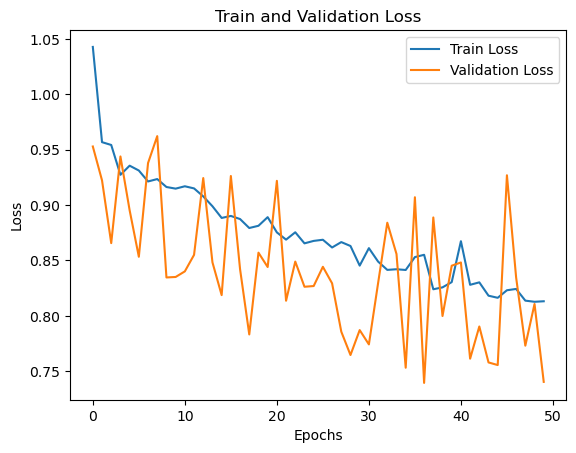

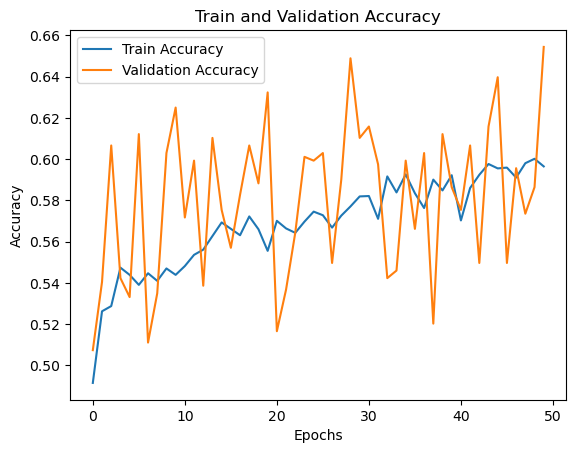

In [32]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

Evaluate a trained neural network model on a test dataset and Report the accuracy of the model on that dataset.

In [33]:
model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
model.eval()

test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
      logits = model(imgs)

    loss = criterion(logits, labels)

    acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
test_acc = sum(test_accs) / len(test_accs)
print(f'Test accuracy {test_acc}')

  0%|          | 0/40 [00:00<?, ?it/s]

Test accuracy 0.5896168947219849


Evaluate the performance of a classification model. Confusion matrix provides a summary of the predictions made by the model on a test dataset, showing the counts of true positive, true negative, false positive, and false negative predictions for each class

In [34]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, preds = torch.max(output, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(target.numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
print(conf_matrix)

[[ 25   0   7 147]
 [  1   0   0  11]
 [  7   0 390 243]
 [ 22   0  87 339]]


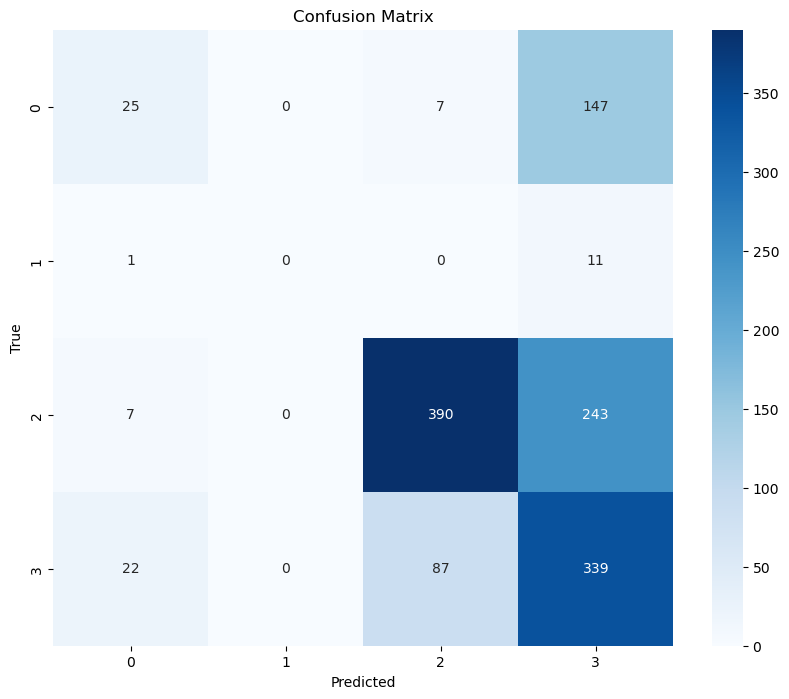

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Above confusion matrix and heatmap suggests that the model performs relatively well for stage "NonDemented" but struggles with other stages, especially in distinguishing them from each other.